In [728]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.pylab as pylab
import pandas as pd
import xarray as xr

In [734]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'figure.titlesize': 'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [570]:
all_files = os.listdir('Data')
amp_nums = [name[name.find('_')+1:name.find('.')] for name in all_files]

In [772]:
data_arr = []

for one_file in all_files:
    data = pd.read_csv(os.path.join('Data', one_file), skiprows=6, delimiter=',')
    data_arr.append(data.to_xarray())
    
ds_all = xr.concat(data_arr, dim='Chan').to_dataframe()

In [773]:
ds_all['Freq(Hz)'] = ds_all['Freq(Hz)'].apply(lambda x: x / 1e6)
ds_all = ds_all.rename(columns={'Freq(Hz)' : 'Freq(MHz)'})

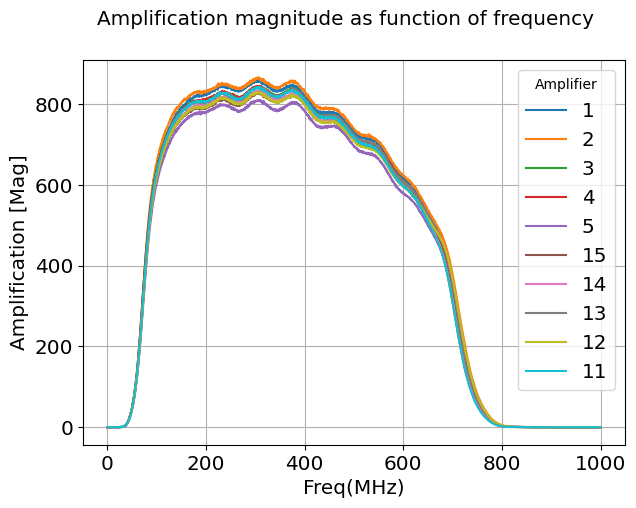

In [794]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ds_all.groupby(level=1).plot(x='Freq(MHz)', y='S21(MAG)', ax=ax)

ax.set_ylabel('Amplification [Mag]')
fig.suptitle('Amplification magnitude as function of frequency')

ax.legend(amp_nums, fancybox=True, title="Amplifier")

plt.grid()
plt.show()

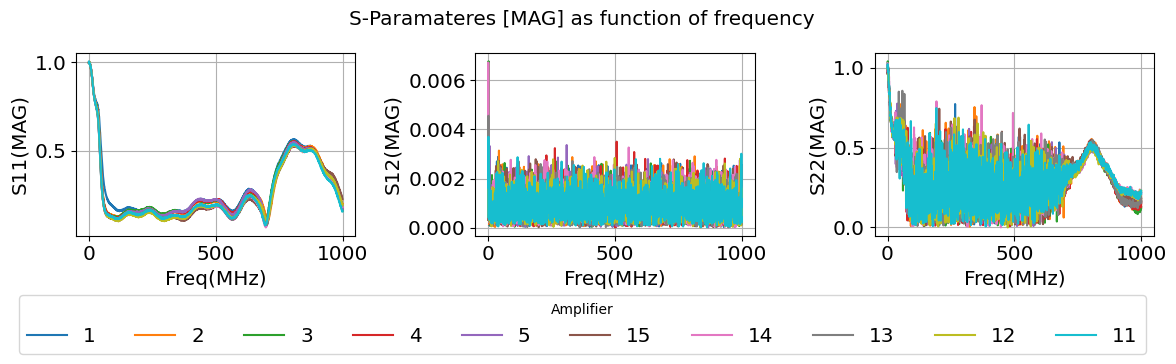

In [800]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

ds_all.groupby(level=1).plot(x='Freq(MHz)', y='S11(MAG)', ax=ax[0])
ax[0].set_ylabel('S11(MAG)')

ds_all.groupby(level=1).plot(x='Freq(MHz)', y='S12(MAG)', ax=ax[1])
ax[1].set_ylabel('S12(MAG)')

ds_all.groupby(level=1).plot(x='Freq(MHz)', y='S22(MAG)', ax=ax[2])
ax[2].set_ylabel('S22(MAG)')

for a in ax:
    a.get_legend().remove()
    a.grid()

fig.suptitle('S-Paramateres [MAG] as function of frequency')

handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, amp_nums, 
           loc='lower center', 
           fancybox=True, 
           title='Amplifier', 
           ncol=len(amp_nums), 
           bbox_to_anchor=(0.5, -0.2))

plt.tight_layout()
plt.show()

/var/folders/qw/b21zlmvd5zn4x6ptjcqxnl040000gq/T/ipykernel_29827/3981520750.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  ds_all.boxplot(column=['S11(MAG)', 'S22(MAG)', 'S12(MAG)', 'S21(MAG)'],


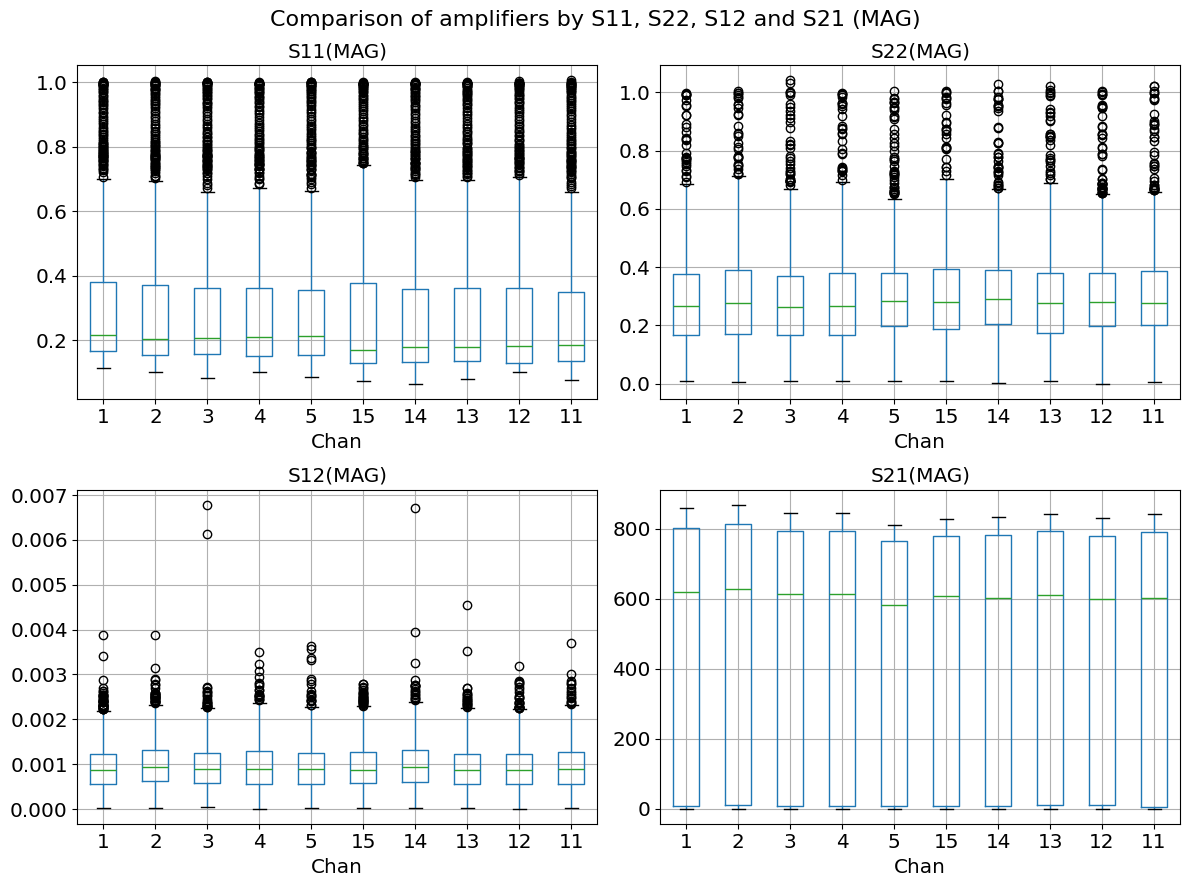

In [797]:
fig, ax = plt.subplots(2, 2, figsize=(12, 9))

ds_all.boxplot(column=['S11(MAG)', 'S22(MAG)', 'S12(MAG)', 'S21(MAG)'], 
                    by='Chan',
                    ax=ax)

for row in ax:
    for a in row:
        a.set_xticklabels(amp_nums)
    
fig.suptitle('Comparison of amplifiers by S11, S22, S12 and S21 (MAG)', fontsize=16)
plt.tight_layout()
plt.show()

/var/folders/qw/b21zlmvd5zn4x6ptjcqxnl040000gq/T/ipykernel_29827/2405042701.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  ds_all.boxplot(column=['S11(DEG)', 'S22(DEG)', 'S12(DEG)', 'S21(DEG)'],


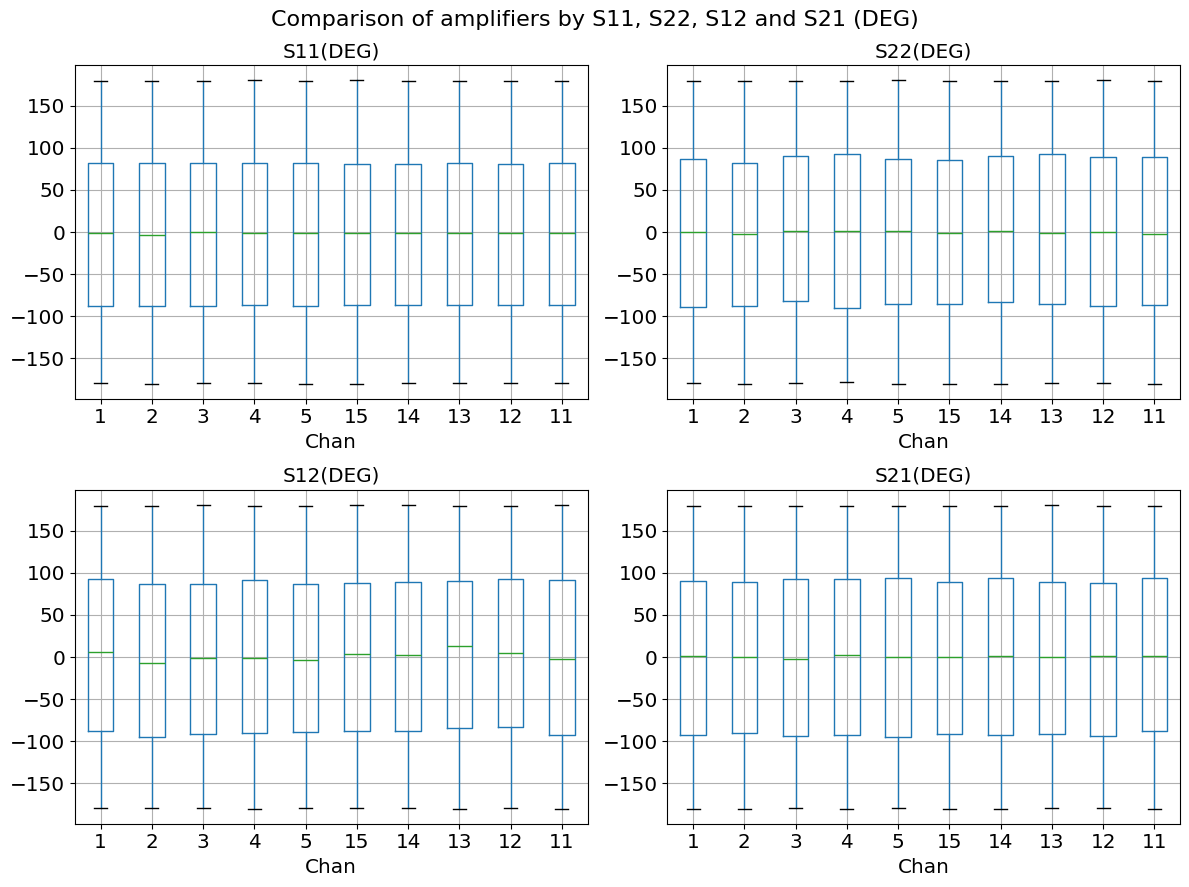

In [739]:
fig, ax = plt.subplots(2, 2, figsize=(12, 9))

ds_all.boxplot(column=['S11(DEG)', 'S22(DEG)', 'S12(DEG)', 'S21(DEG)'], 
                    by='Chan',
                    ax=ax)

for row in ax:
    for a in row:
        a.set_xticklabels(amp_nums)

fig.suptitle('Comparison of amplifiers by S11, S22, S12 and S21 (DEG)', fontsize=16)
plt.tight_layout()
plt.show()

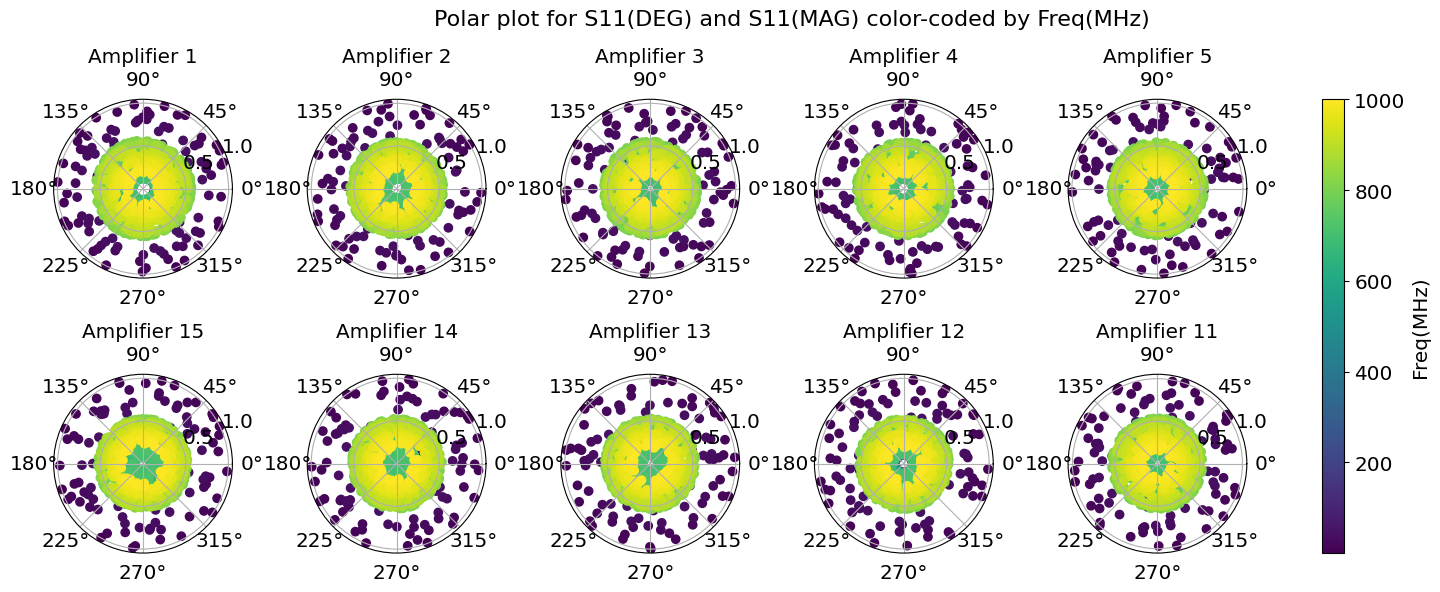

In [785]:
fig, ax = plt.subplots(2, 5, figsize=(16, 6), subplot_kw={'projection': 'polar'})

for i, a in enumerate(ax.flat):
    a.scatter(ds_all['S11(DEG)'][:, i], ds_all['S11(MAG)'][:, i], c=ds_all['Freq(MHz)'][:, i])
    a.set_title(f'Amplifier {amp_nums[i]}')

fig.suptitle('Polar plot for S11(DEG) and S11(MAG) color-coded by Freq(MHz)', fontsize=16)
plt.tight_layout()
cb = plt.colorbar(plt.gca().get_children()[0], ax=ax.ravel().tolist())
cb.set_label('Freq(MHz)')

plt.show()

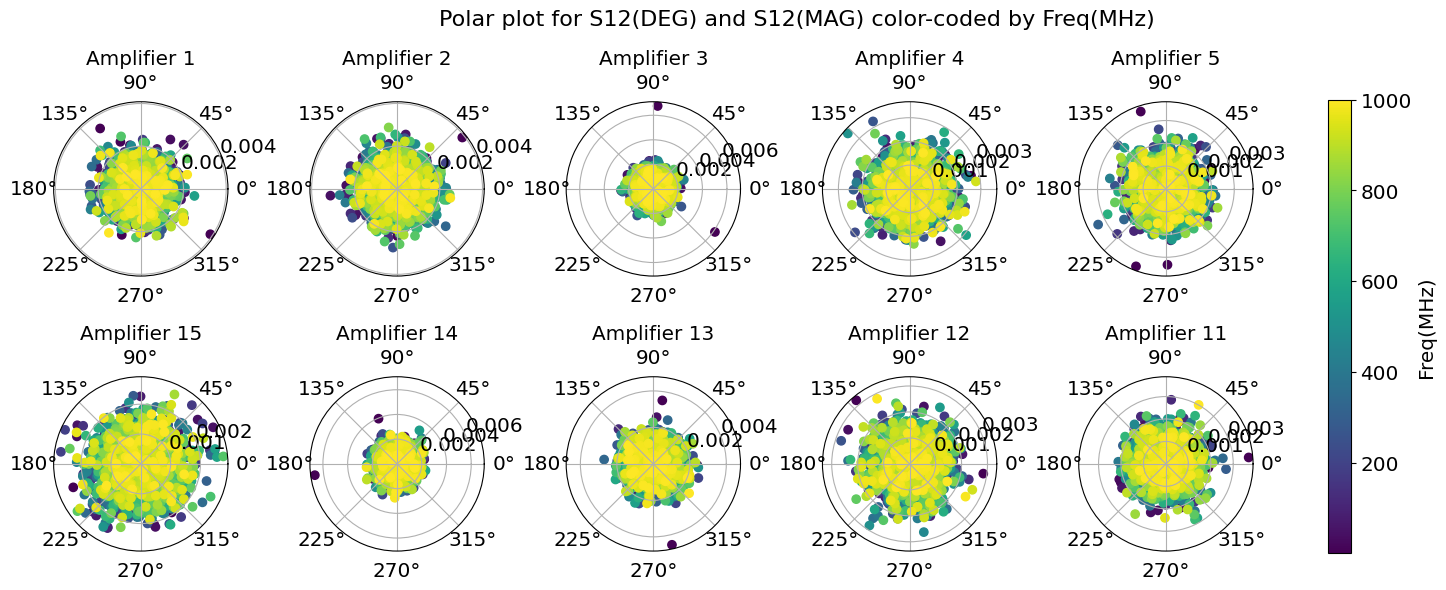

In [786]:
fig, ax = plt.subplots(2, 5, figsize=(16, 6), subplot_kw={'projection': 'polar'})

for i, a in enumerate(ax.flat):
    sc = a.scatter(ds_all['S12(DEG)'][:, i], ds_all['S12(MAG)'][:, i], c=ds_all['Freq(MHz)'][:, i])
    a.set_title(f'Amplifier {amp_nums[i]}')

fig.suptitle('Polar plot for S12(DEG) and S12(MAG) color-coded by Freq(MHz)', fontsize=16)
plt.tight_layout()
cb = plt.colorbar(plt.gca().get_children()[0], ax=ax.ravel().tolist())
cb.set_label('Freq(MHz)')
plt.show()

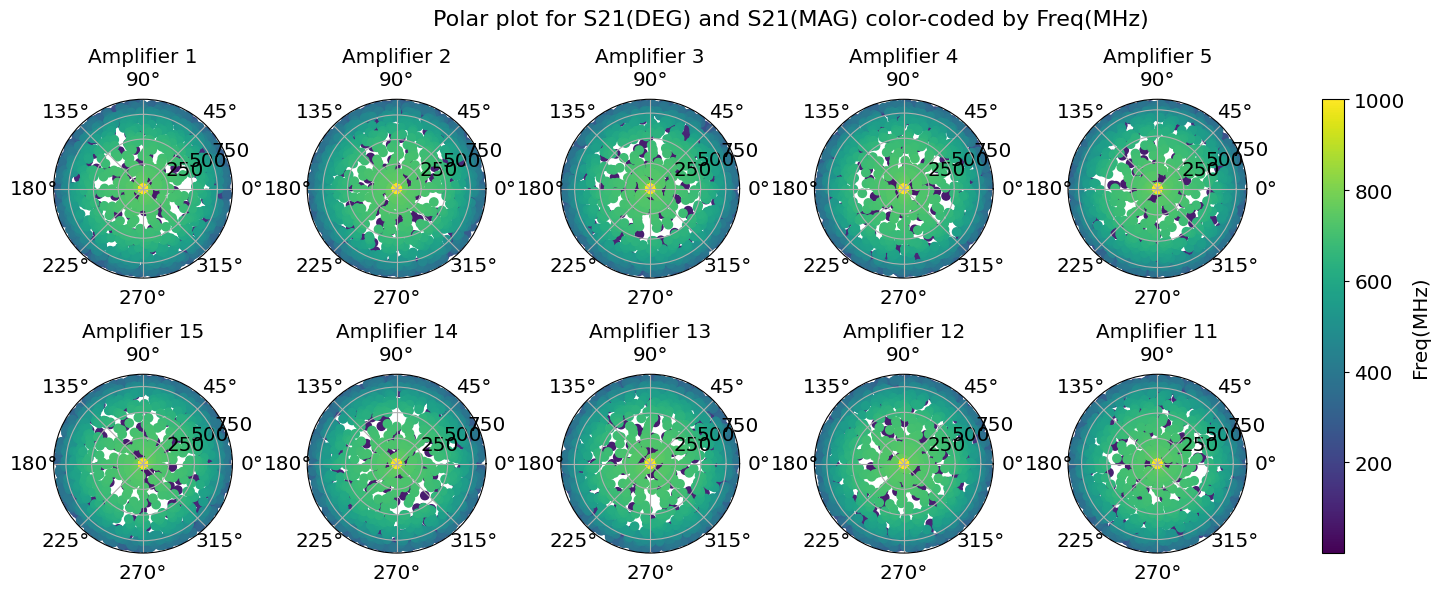

In [801]:
fig, ax = plt.subplots(2, 5, figsize=(16, 6), subplot_kw={'projection': 'polar'})

for i, a in enumerate(ax.flat):
    sc = a.scatter(ds_all['S21(DEG)'][:, i], ds_all['S21(MAG)'][:, i], c=ds_all['Freq(MHz)'][:, i])
    a.set_title(f'Amplifier {amp_nums[i]}')

fig.suptitle('Polar plot for S21(DEG) and S21(MAG) color-coded by Freq(MHz)', fontsize=16)
plt.tight_layout()
cb = plt.colorbar(plt.gca().get_children()[0], ax=ax.ravel().tolist())
cb.set_label('Freq(MHz)')
plt.show()

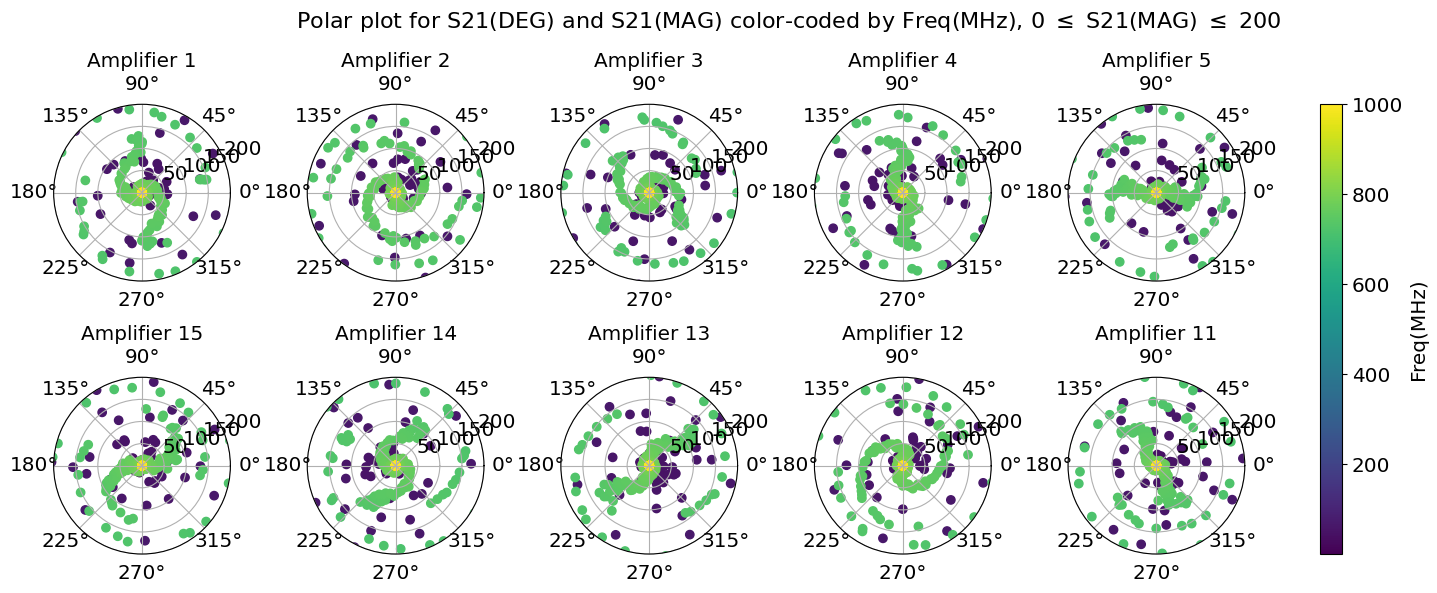

In [802]:
fig, ax = plt.subplots(2, 5, figsize=(16, 6), subplot_kw={'projection': 'polar'})

for i, a in enumerate(ax.flat):
    sc = a.scatter(ds_all['S21(DEG)'][:, i], ds_all['S21(MAG)'][:, i], c=ds_all['Freq(MHz)'][:, i])
    a.set_rmin(0)
    a.set_rmax(200)
    a.set_title(f'Amplifier {amp_nums[i]}')

fig.suptitle('Polar plot for S21(DEG) and S21(MAG) color-coded by Freq(MHz), 0 $\leq$ S21(MAG) $\leq$ 200', fontsize=16)
plt.tight_layout()
cb = plt.colorbar(plt.gca().get_children()[0], ax=ax.ravel().tolist())
cb.set_label('Freq(MHz)')
plt.show()

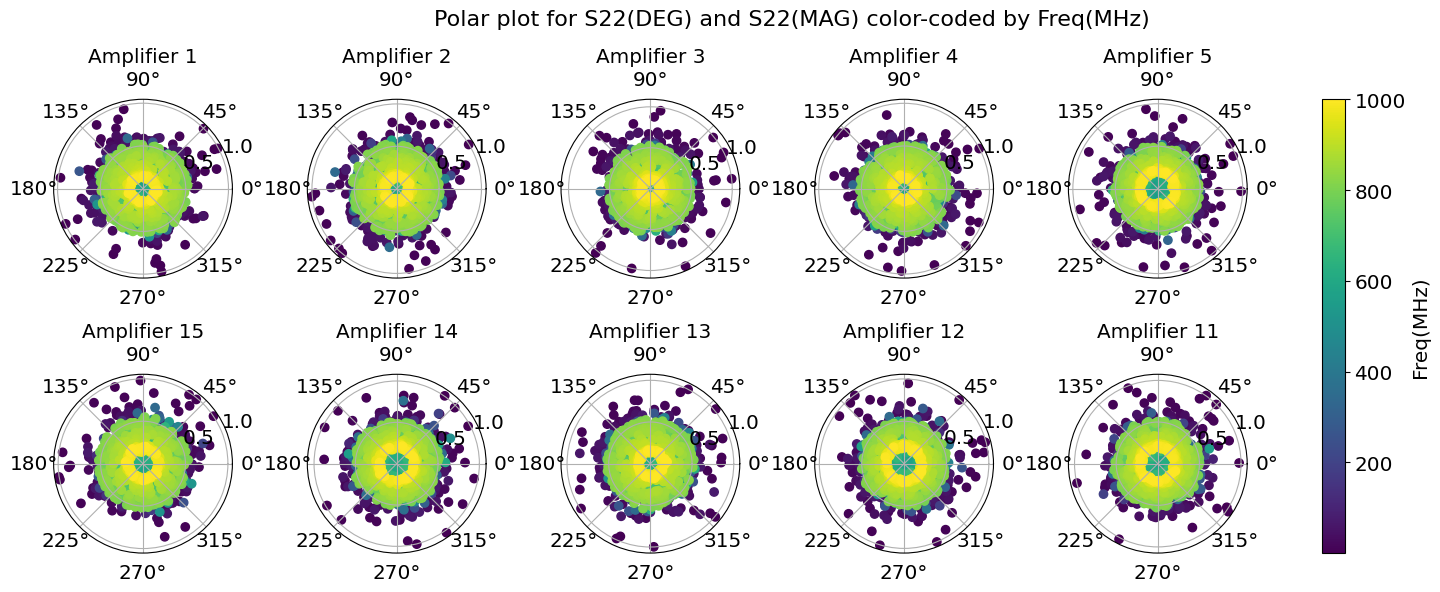

In [791]:
fig, ax = plt.subplots(2, 5, figsize=(16, 6), subplot_kw={'projection': 'polar'})

for i, a in enumerate(ax.flat):
    a.scatter(ds_all['S22(DEG)'][:, i], ds_all['S22(MAG)'][:, i], c=ds_all['Freq(MHz)'][:, i])
    a.set_title(f'Amplifier {amp_nums[i]}')

fig.suptitle('Polar plot for S22(DEG) and S22(MAG) color-coded by Freq(MHz)', fontsize=16)
plt.tight_layout()
cb = plt.colorbar(plt.gca().get_children()[0], ax=ax.ravel().tolist())
cb.set_label('Freq(MHz)')
plt.show()